# SIR-модель

SIR-модель — это математическая модель, которая используется для описания распространения инфекционных заболеваний в популяции. Аббревиатура SIR расшифровывается как Susceptible (восприимчивые), Infected (инфицированные) и Recovered (выздоровевшие).

<img src="sir.png" alt="Description" width=720>

In [2]:
include("./compart.jl")

@variables s i r

sir = @cmodel s i r

@rule sir α(s + i → i + i)
@rule sir β(i → r)

@showrules sir

L"$i + s \overset{α}\to 2i$"

L"$i \overset{β}\to r$"

In [9]:
drift_vector([s i r], sir[1])

3×1 Matrix{Num}:
       -i*s*α
 -i*β + i*s*α
          i*β

In [4]:
linecolors = [:blue :green :orange]

labels = [s i r]

α₁, β₁ = (0.01, 0.5)

steps = 1500
te = 5

x = simulate3(sir[1], [100,100,0], [α₁, β₁], te, nothing, steps)

7501-element Vector{Vector{Int64}}:
 [100, 100, 0]
 [100, 99, 1]
 [100, 99, 1]
 [100, 99, 1]
 [100, 99, 1]
 [99, 100, 1]
 [99, 100, 1]
 [99, 100, 1]
 [99, 99, 2]
 [99, 99, 2]
 [99, 99, 2]
 [99, 99, 2]
 [98, 100, 2]
 ⋮
 [1, 17, 182]
 [1, 17, 182]
 [1, 17, 182]
 [1, 17, 182]
 [1, 17, 182]
 [1, 17, 182]
 [1, 17, 182]
 [1, 17, 182]
 [1, 17, 182]
 [1, 17, 182]
 [1, 17, 182]
 [1, 17, 182]

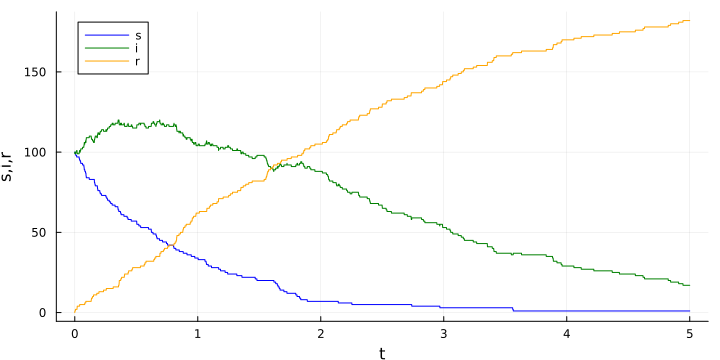

In [7]:
using Plots

p = plot(size=(720,360), ylabel = "s,i,r", xlabel = "t")

for j in 1:length(x[1])
    plot!(p, range(0,te,te*steps + 1), [i[j] for i in x], linecolor=linecolors[j], label = labels[j])
end

plot(p)